# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Это поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. Используем данные с параметрами добычи и очистки. 

Проект оформлен в несколько неформальном виде с некоторыми методолгическими допущениями, но было решено не менять структуру, дабы сохранить последовательность мыслей и этапов поиска, чтобы было ясно почему принимались те или иные решения.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов" data-toc-modified-id="Анализ-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья" data-toc-modified-id="Распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья</a></span></li><li><span><a href="#Анализ-суммарной-концентрации-всех-веществ" data-toc-modified-id="Анализ-суммарной-концентрации-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ суммарной концентрации всех веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Определение-метрики-качества" data-toc-modified-id="Определение-метрики-качества-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение метрики качества</a></span></li><li><span><a href="#Подготовка-библиотек-и-функций-для-подбора-гиперпараметров" data-toc-modified-id="Подготовка-библиотек-и-функций-для-подбора-гиперпараметров-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка библиотек и функций для подбора гиперпараметров</a></span></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Стохастический-градиентный-спуск" data-toc-modified-id="Стохастический-градиентный-спуск-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Стохастический градиентный спуск</a></span></li><li><span><a href="#Гребневая-регрессия" data-toc-modified-id="Гребневая-регрессия-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Гребневая регрессия</a></span></li><li><span><a href="#Метод-k-ближайших-соседей" data-toc-modified-id="Метод-k-ближайших-соседей-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Метод k-ближайших соседей</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг-(sklearn-с-подбором-гиперпараметров)" data-toc-modified-id="Градиентный-бустинг-(sklearn-с-подбором-гиперпараметров)-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Градиентный бустинг (sklearn с подбором гиперпараметров)</a></span></li><li><span><a href="#Градиентный-бустинг-(CatBoost-с-автоматической-установкой-гиперпараметров)" data-toc-modified-id="Градиентный-бустинг-(CatBoost-с-автоматической-установкой-гиперпараметров)-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span>Градиентный бустинг (CatBoost с автоматической установкой гиперпараметров)</a></span></li><li><span><a href="#Ручная-проверка-лучшей-модели-повтороной-кросс-валидацией" data-toc-modified-id="Ручная-проверка-лучшей-модели-повтороной-кросс-валидацией-3.3.9"><span class="toc-item-num">3.3.9&nbsp;&nbsp;</span>Ручная проверка лучшей модели повтороной кросс-валидацией</a></span></li></ul></li><li><span><a href="#Финальное-тестирование" data-toc-modified-id="Финальное-тестирование-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Финальное тестирование</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-финальному-тестированию" data-toc-modified-id="Подготовка-к-финальному-тестированию-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Подготовка к финальному тестированию</a></span></li><li><span><a href="#Baseline-тест" data-toc-modified-id="Baseline-тест-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Baseline тест</a></span></li><li><span><a href="#Финальное-тестирование" data-toc-modified-id="Финальное-тестирование-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Финальное тестирование</a></span></li></ul></li><li><span><a href="#Тестирование-похода-с-нормированием-таргета" data-toc-modified-id="Тестирование-похода-с-нормированием-таргета-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тестирование похода с нормированием таргета</a></span><ul class="toc-item"><li><span><a href="#Baseline-c-нормированием" data-toc-modified-id="Baseline-c-нормированием-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Baseline c нормированием</a></span></li><li><span><a href="#Метод-k-ближайших-соседей-c-нормированием" data-toc-modified-id="Метод-k-ближайших-соседей-c-нормированием-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Метод k-ближайших соседей c нормированием</a></span></li><li><span><a href="#Гребневая-регрессия-c-нормированием" data-toc-modified-id="Гребневая-регрессия-c-нормированием-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Гребневая регрессия c нормированием</a></span></li><li><span><a href="#Случайный-лес-c-нормированием" data-toc-modified-id="Случайный-лес-c-нормированием-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Случайный лес c нормированием</a></span></li><li><span><a href="#Градиентный-бустинг-(CatBoost-с-автоматической-установкой-гиперпараметров)-c-нормированием" data-toc-modified-id="Градиентный-бустинг-(CatBoost-с-автоматической-установкой-гиперпараметров)-c-нормированием-3.5.5"><span class="toc-item-num">3.5.5&nbsp;&nbsp;</span>Градиентный бустинг (CatBoost с автоматической установкой гиперпараметров) c нормированием</a></span></li></ul></li><li><span><a href="#Финальное-тестирование-с-масштабированием-таргета" data-toc-modified-id="Финальное-тестирование-с-масштабированием-таргета-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Финальное тестирование с масштабированием таргета</a></span><ul class="toc-item"><li><span><a href="#Baseline-c-нормированием-тест" data-toc-modified-id="Baseline-c-нормированием-тест-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Baseline c нормированием тест</a></span></li><li><span><a href="#Финальное-тестирование-c-нормированием" data-toc-modified-id="Финальное-тестирование-c-нормированием-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Финальное тестирование c нормированием</a></span></li></ul></li></ul></li></ul></div>

## Подготовка данных

Внимание! Если на вашем устройстве при исполнении графики не отображаются/отображаются с ошибками, пожалуйста, закоментируйте и/или не выполняйте следующую ячейку кода:

In [1]:
# Увеличение разрешения визуализаций
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/tmp/ipykernel_119/4102136135.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
!pip install hyperopt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
from functools import partial
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from scipy.stats import norm
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tqdm.auto import tqdm

sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
# Загрузим датафреймы
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [5]:
# Посмотрим на фичи
train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Проверим верность данных эффективности обогащения после флотации.

In [6]:
from sklearn.metrics import mean_absolute_error

rec_rough = (train['rougher.output.concentrate_au'] * \
             (train['rougher.input.feed_au'] - 
              train['rougher.output.tail_au'])) /\
            (train['rougher.input.feed_au'] * \
             (train['rougher.output.concentrate_au'] - 
              train['rougher.output.tail_au'])) * 100

mean_absolute_error(train['rougher.output.recovery'], rec_rough)

9.73512347450521e-15

Разница в расчетах и предоставленных данных на уровне вычислительной ошибки, следовательно данные верны.

In [7]:
# Проверяем отсутствие дубликатов
train.duplicated().sum()

0

In [8]:
# Проверяем корректность типов данных
train.dtypes.value_counts()

float64    86
object      1
dtype: int64

In [9]:
# Проверяем наличие пропусков
train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

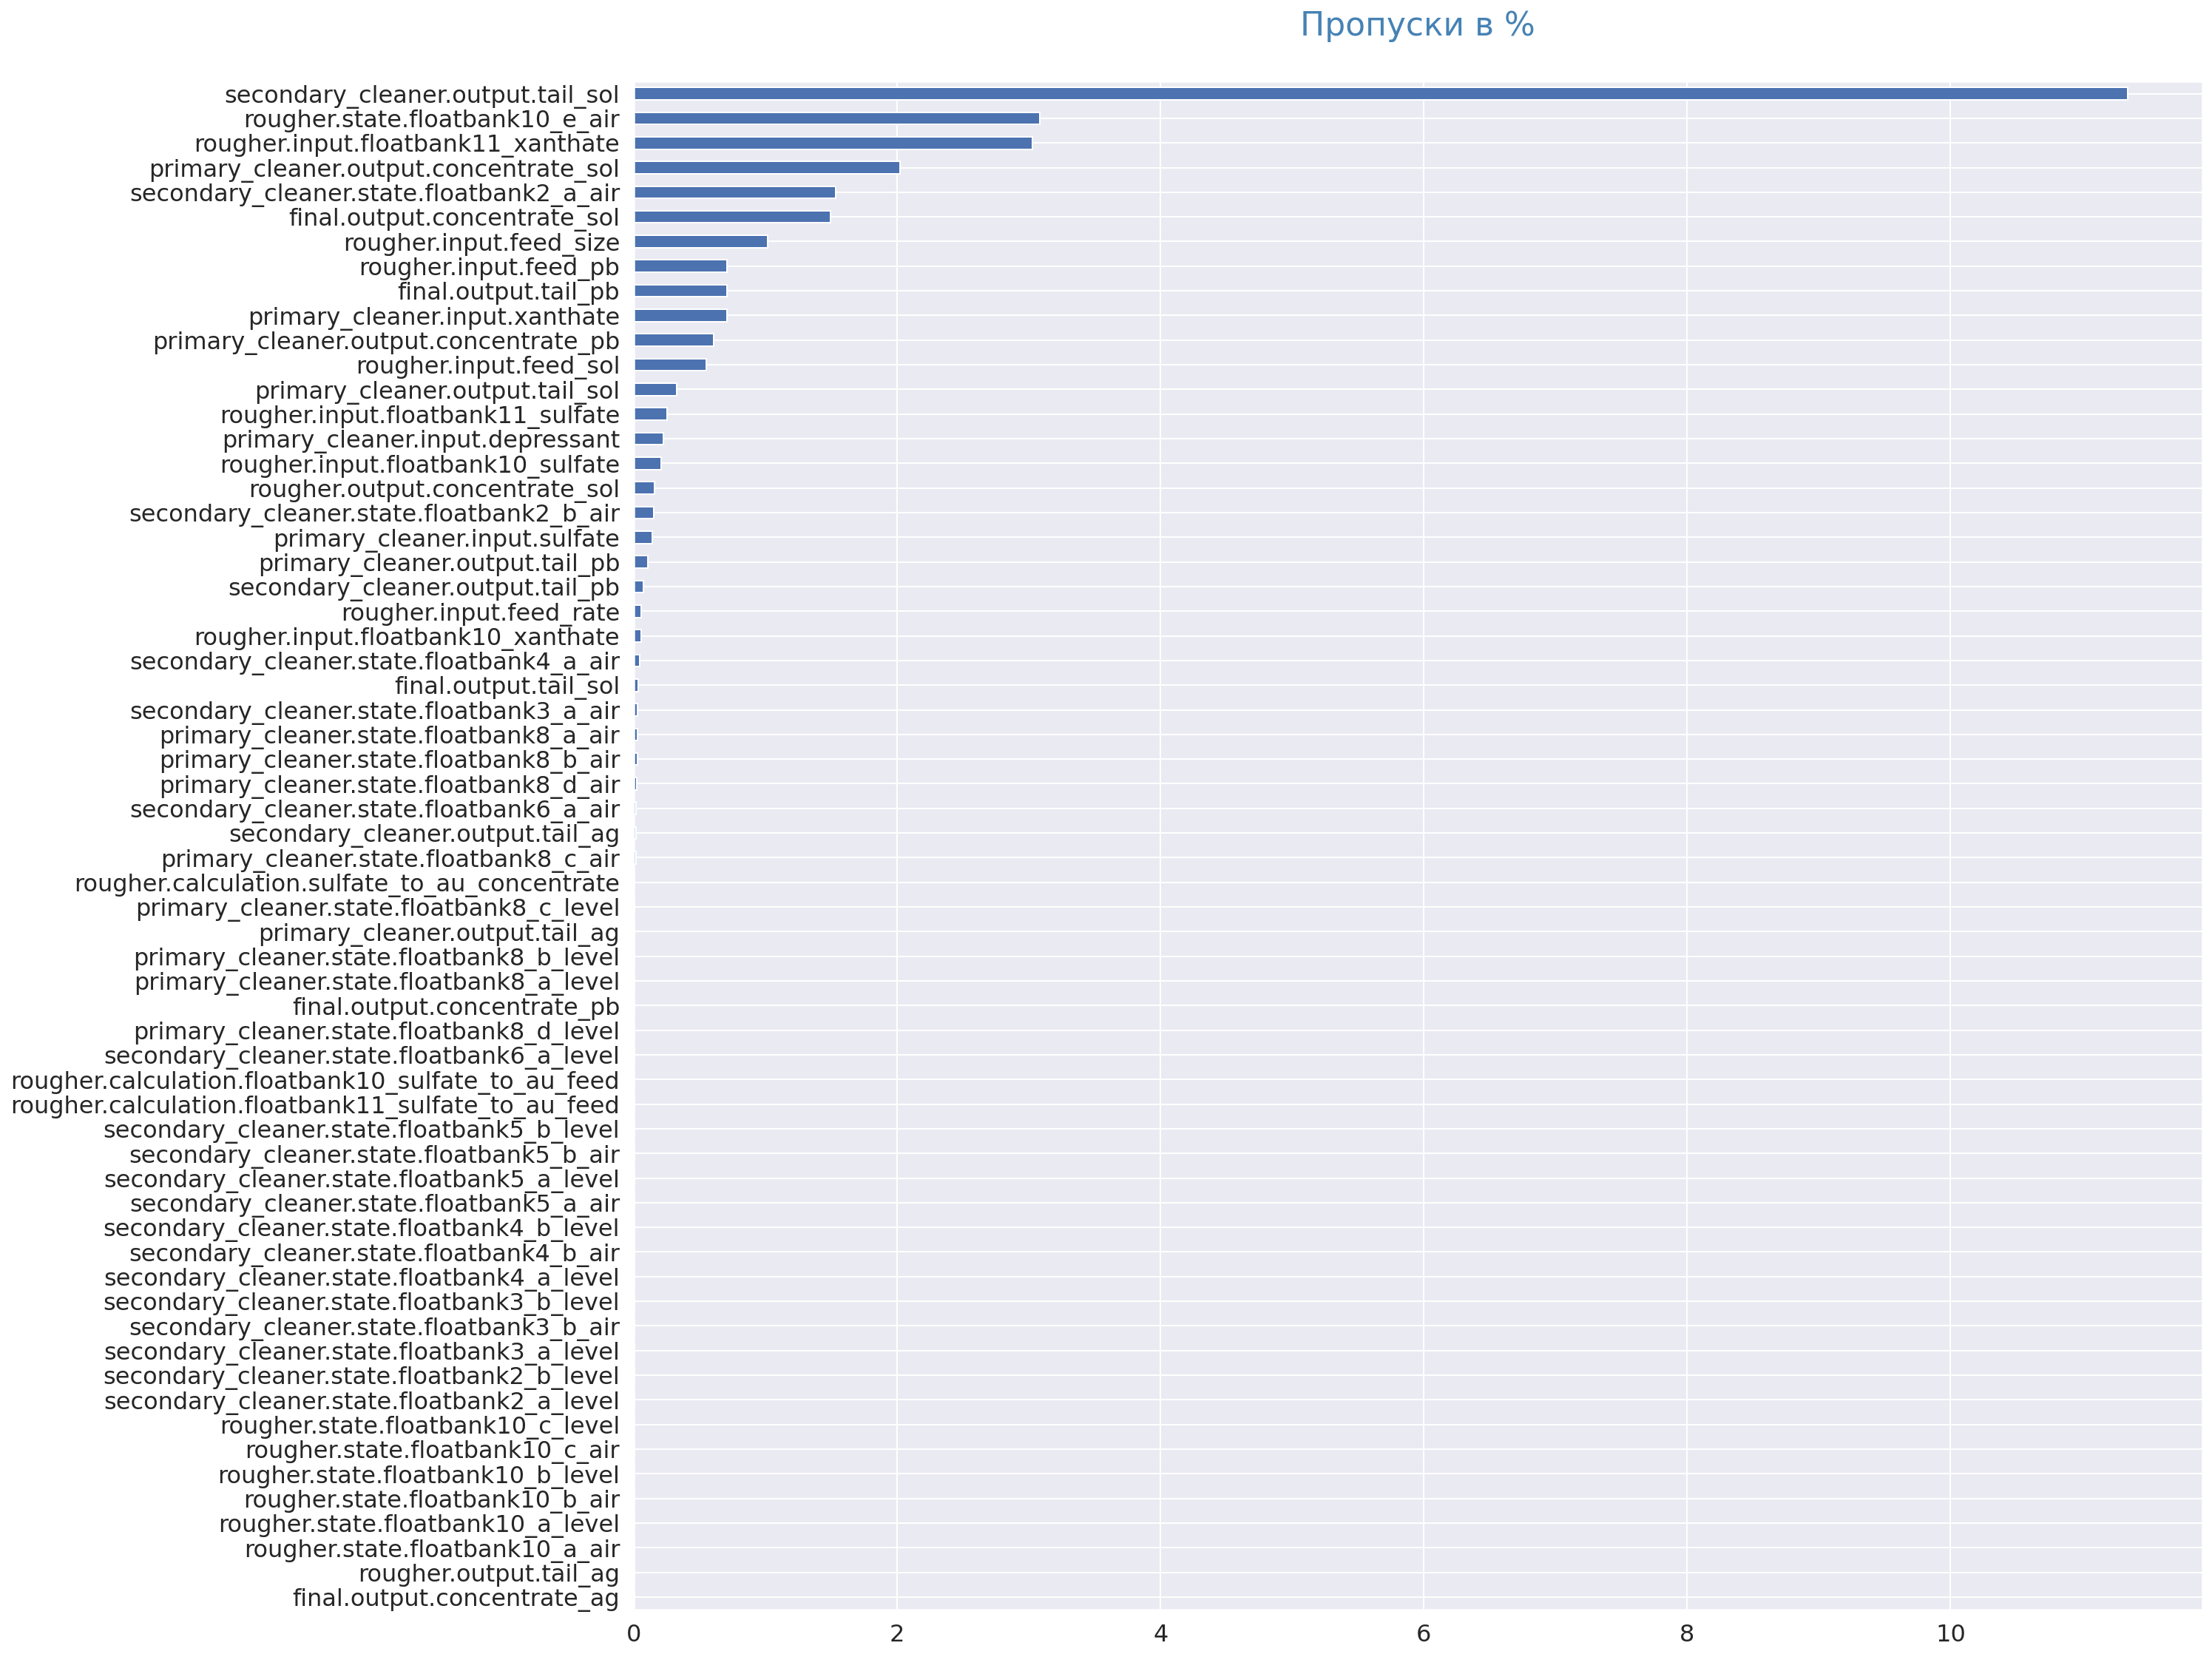

In [10]:
# Визуализируем пропуски
(
    (train.isna().mean()*100)
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = True)
    .plot(kind= 'barh', figsize=(19,19), legend = False, fontsize = 16)
    .set_title('Пропуски в %' + "\n", fontsize = 22, color = 'SteelBlue')    
)
plt.show()

Так как в обучающей и тестовой выборке есть разница в количсетве фичей, осмторим отсутствующие в тестовой выборке признаки.

In [11]:
set(train.columns) - set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Все признаки соответствуют промежуточным либо финальным результатам производственного процесса, тогда как на тестовой даны только характеристики входного сырья и условия процесса ступеней очистки. Удалим из обучающей выборки все признаки, отсутствующие в тесте, кроме целевых признаков.

In [12]:
ls = list(set(train.columns) - set(test.columns))
ls.remove('final.output.recovery')
ls.remove('rougher.output.recovery')
train = train.drop(columns=ls)

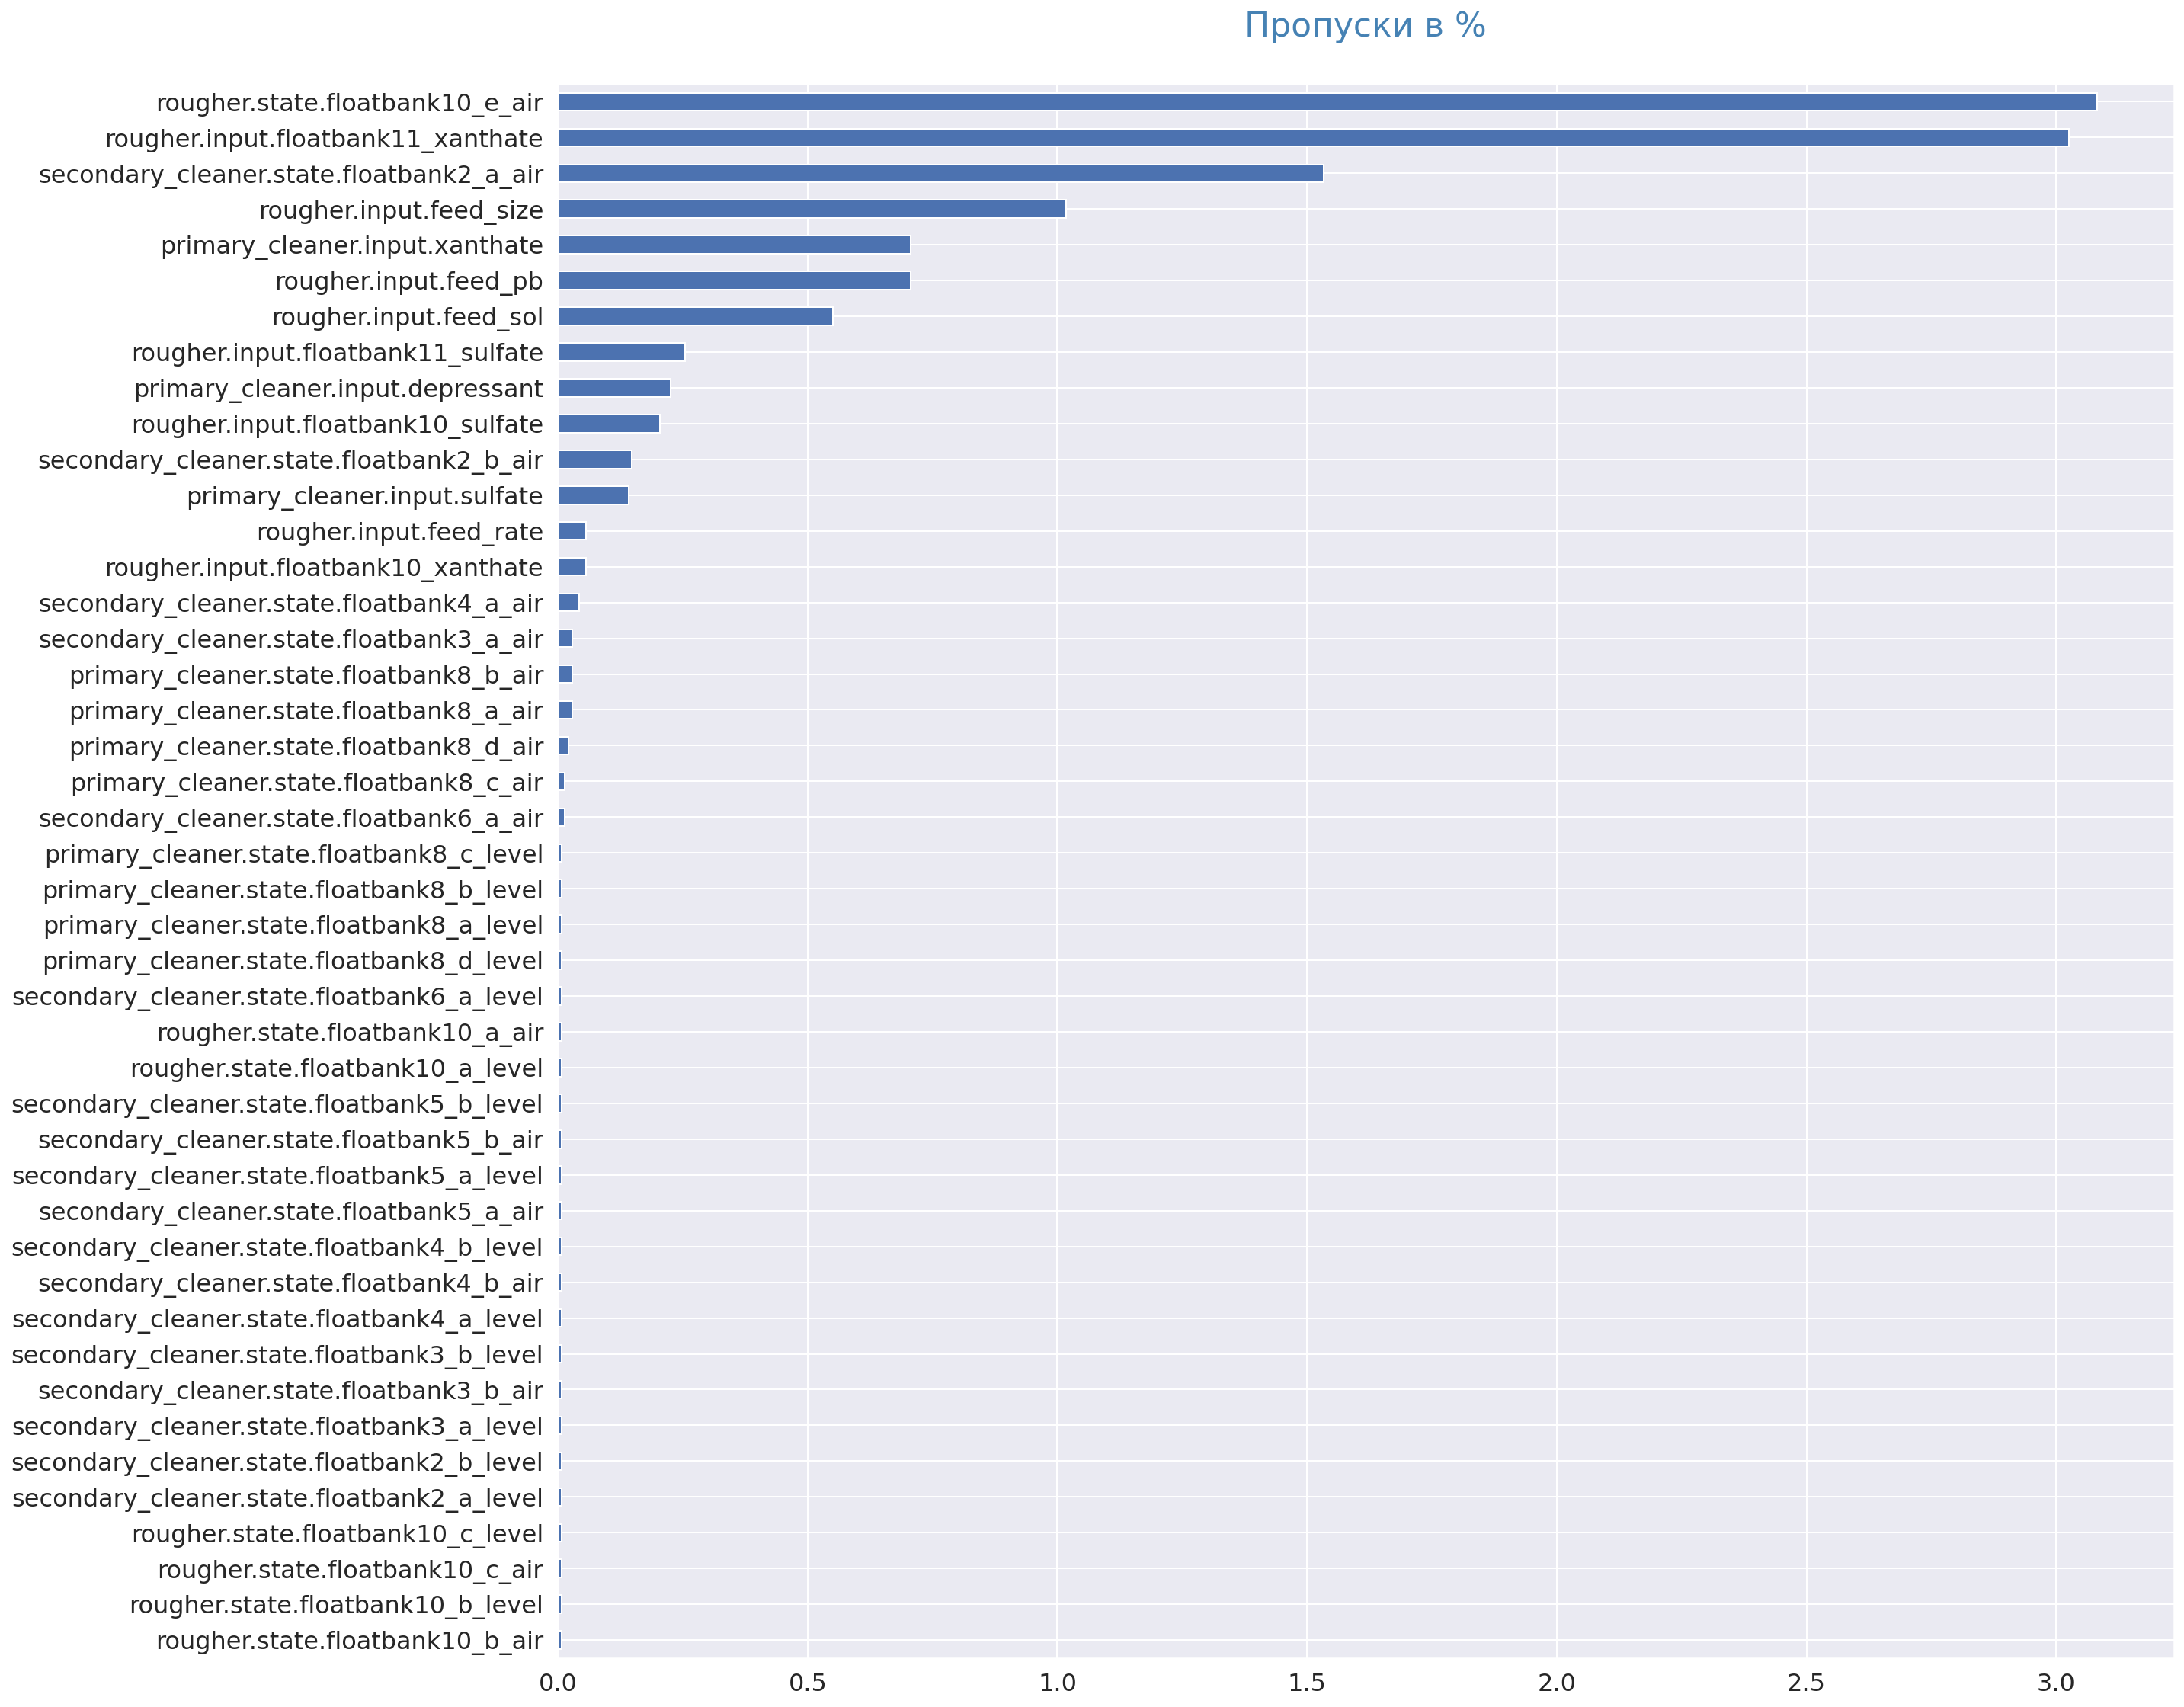

In [13]:
# Визуализируем пропуски
(
    (train.isna().mean()*100)
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = True)
    .plot(kind= 'barh', figsize=(19,19), legend = False, fontsize = 16)
    .set_title('Пропуски в %' + "\n", fontsize = 22, color = 'SteelBlue')    
)
plt.show()

In [14]:
train_complete = train.dropna()
train_complete = train_complete.drop(columns='date')
print(f'{(1 - train_complete.shape[0] / train.shape[0]) * 100:.2f}%')

10.39%


Около 10% данных в обучающей выборке пропущены, так как данные представленны в виде временного ряда с упорядоченными и уникальными временными метками, а близкие по времени значения должны быть похожи, заполним пропуски последующим значчением.

In [15]:
train = train.fillna(method='ffill')
print(f'Пропуски: {train.isna().sum().sum()}')

Пропуски: 0


Посмотрим на распределение целевых признаков.

<AxesSubplot:>

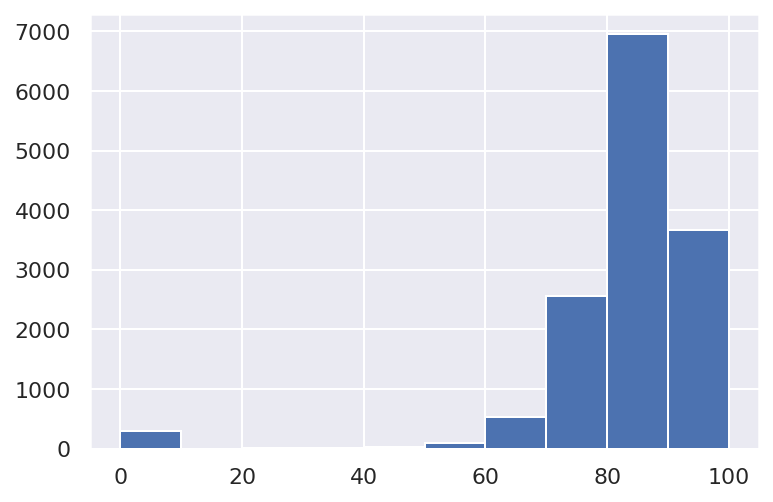

In [16]:
train['rougher.output.recovery'].hist()

<AxesSubplot:>

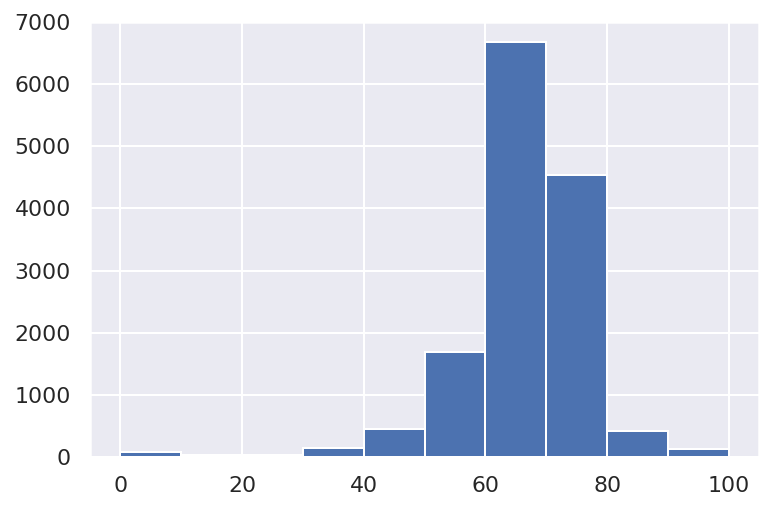

In [17]:
train['final.output.recovery'].hist()

На лицо выбросы в районе нуля, отсечем данные значения для лучшего обучения моделей.

In [18]:
before = train.shape[0]
train = train[train['rougher.output.recovery'] > 10]
train = train[train['final.output.recovery'] > 10]
after = train.shape[0]
print(f'Удалено {(1 - after/before) * 100:.2f}%')

Удалено 2.62%


Процент потери совсем незначителен относительно возможных искажений моделей. 

## Анализ данных

### Анализ концентрации металлов

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [19]:
temp = df[
            ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb',
             'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
             'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
             'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', 
             'final.output.concentrate_ag', 'final.output.concentrate_pb']
        ]

temp.columns = ['сырье_золото', 'сырье_серебро', 'сырье_свинец', 
                'черновой_концентрат_золото', 'черновой_концентрат_серебро', 'черновой_концентрат_свинец',
                'очистка_1_золото', 'очистка_1_серебро', 'очистка_1_свинец',
                'финальный_концентрат_золото', 'финальный_концентрат_серебро', 'финальный_концентрат_свинец']

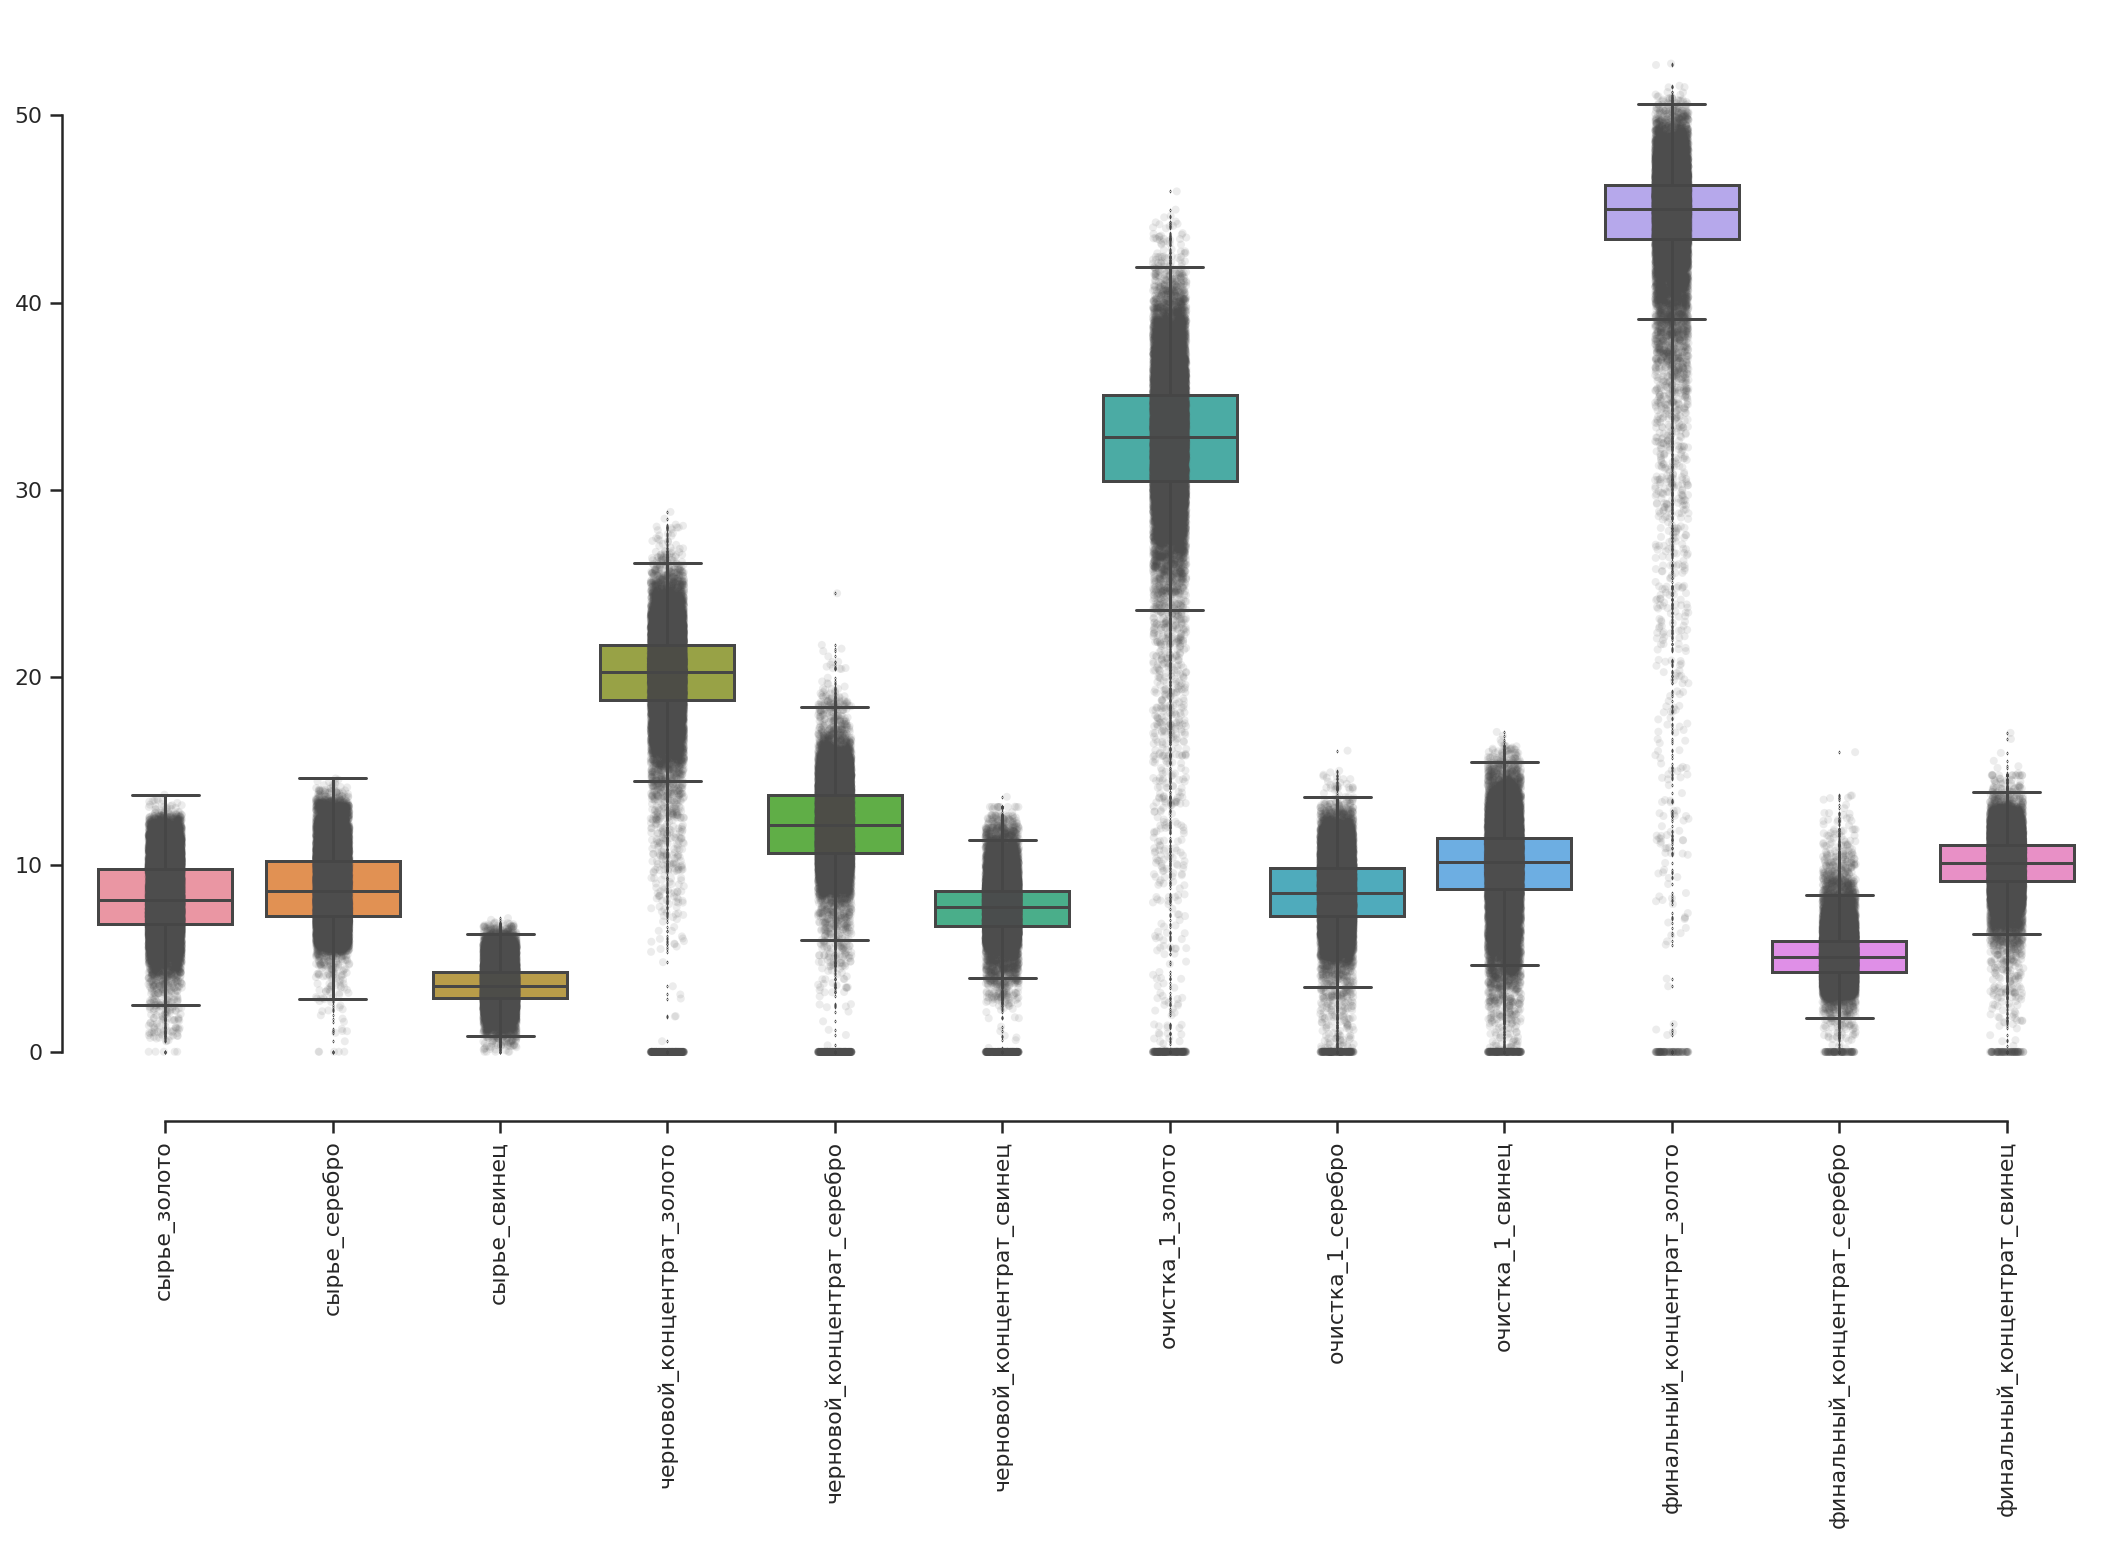

In [20]:
sns.set_theme(style="ticks", palette="pastel")
f, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(data=temp, fliersize=0.1)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
sns.stripplot(data=temp, size=4, color=".3", linewidth=0, alpha=0.1)
plt.show()

На каждом этапе очистки концентрация золота повышается. Флотация, судя по всему в большей степепни удаляет различные вещества помимо серебра и свинца, так как в черновом концентрате увеличивается концентрация всех трех исследуемых металлов. Первый и второй этап очистки уже удаляет и серебро со свинцом. Также, судя по данным, серебро на очистке удаляется эффектнивнее свинца. Начиная с этапа опсле влотации в данных есть аномальные нулевые значения, возможно свидетельствующие об отсутствии данных или об ошибках измерительных приборов.

### Распределения размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 
Если распределения сильно отличаются друг от друга, оценка модели может быть сильно искажена.

In [21]:
# Обьявляем функцию для бутстрэпирования
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
    tot_mean = (np.mean(data_column_1) + np.mean(data_column_2)) / 2
    diff = (quants.iloc[0][0] / tot_mean, quants.iloc[1][0] / tot_mean)
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=boot_it / 20, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"difference": diff,
            ""
            "quants": quants, 
            "p_value": p_value}

In [22]:
train_for_stat = train[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']].dropna()
test_for_stat = test[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']].dropna()

  0%|          | 0/1000 [00:00<?, ?it/s]

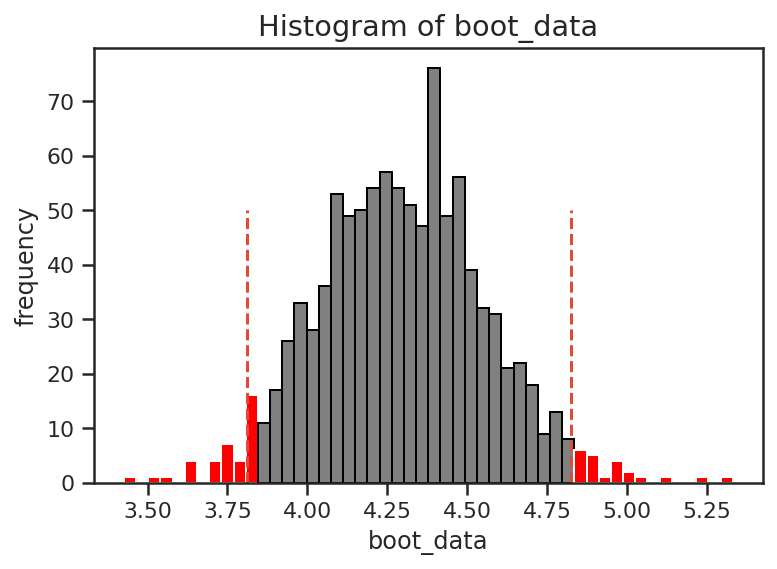

{'difference': (0.06558114651177432, 0.08306222776395634),
 'quants':               0
 0.025  3.810783
 0.975  4.826572,
 'p_value': 3.100992421175024e-61}

In [23]:
get_bootstrap(train_for_stat['rougher.input.feed_size'], test_for_stat['rougher.input.feed_size'])

Распределения размеров гранул сырья на обучающей и тестовой выборках определенно различаются, причем достаточно существенно - 95%-ный доверительный интервал различия: 6.4%-8%. Это может сильно влиять на качестве модели на тестовой выборке. В дальнейшем при финальном тестировании обязательно надо учитвать данный факт.

### Анализ суммарной концентрации всех веществ

Оценим суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [24]:
df.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [25]:
temp = df[
            ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol',
             'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
             'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
             'final.output.concentrate_au', 'final.output.concentrate_ag', 
             'final.output.concentrate_pb', 'final.output.concentrate_sol']
        ]

temp.columns = ['сырье_золото', 'сырье_серебро', 'сырье_свинец', 'сырье_?',
                'черновой_концентрат_золото', 'черновой_концентрат_серебро', 
                'черновой_концентрат_свинец', 'черновой_концентрат_?',
                'финальный_концентрат_золото', 'финальный_концентрат_серебро', 
                'финальный_концентрат_свинец', 'финальный_концентрат_?']

temp['сырье_металлы'] = temp['сырье_золото'] + temp['сырье_серебро'] + temp['сырье_свинец']
temp['сырье_все'] = temp['сырье_металлы'] + temp['сырье_?']

temp['черновой_концентрат_металлы'] = temp['черновой_концентрат_золото'] + \
    temp['черновой_концентрат_серебро'] + temp['черновой_концентрат_свинец']
temp['черновой_концентрат_все'] = temp['черновой_концентрат_металлы'] + temp['черновой_концентрат_?']

temp['финальный_концентрат_металлы'] = temp['финальный_концентрат_золото'] + \
    temp['финальный_концентрат_серебро'] + temp['финальный_концентрат_свинец']
temp['финальный_концентрат_все'] = temp['финальный_концентрат_металлы'] + temp['финальный_концентрат_?']

temp = temp.drop(columns=['сырье_золото', 'сырье_серебро', 'сырье_свинец', 'сырье_?',
                'черновой_концентрат_золото', 'черновой_концентрат_серебро', 
                'черновой_концентрат_свинец', 'черновой_концентрат_?',
                'финальный_концентрат_золото', 'финальный_концентрат_серебро', 
                'финальный_концентрат_свинец', 'финальный_концентрат_?'])

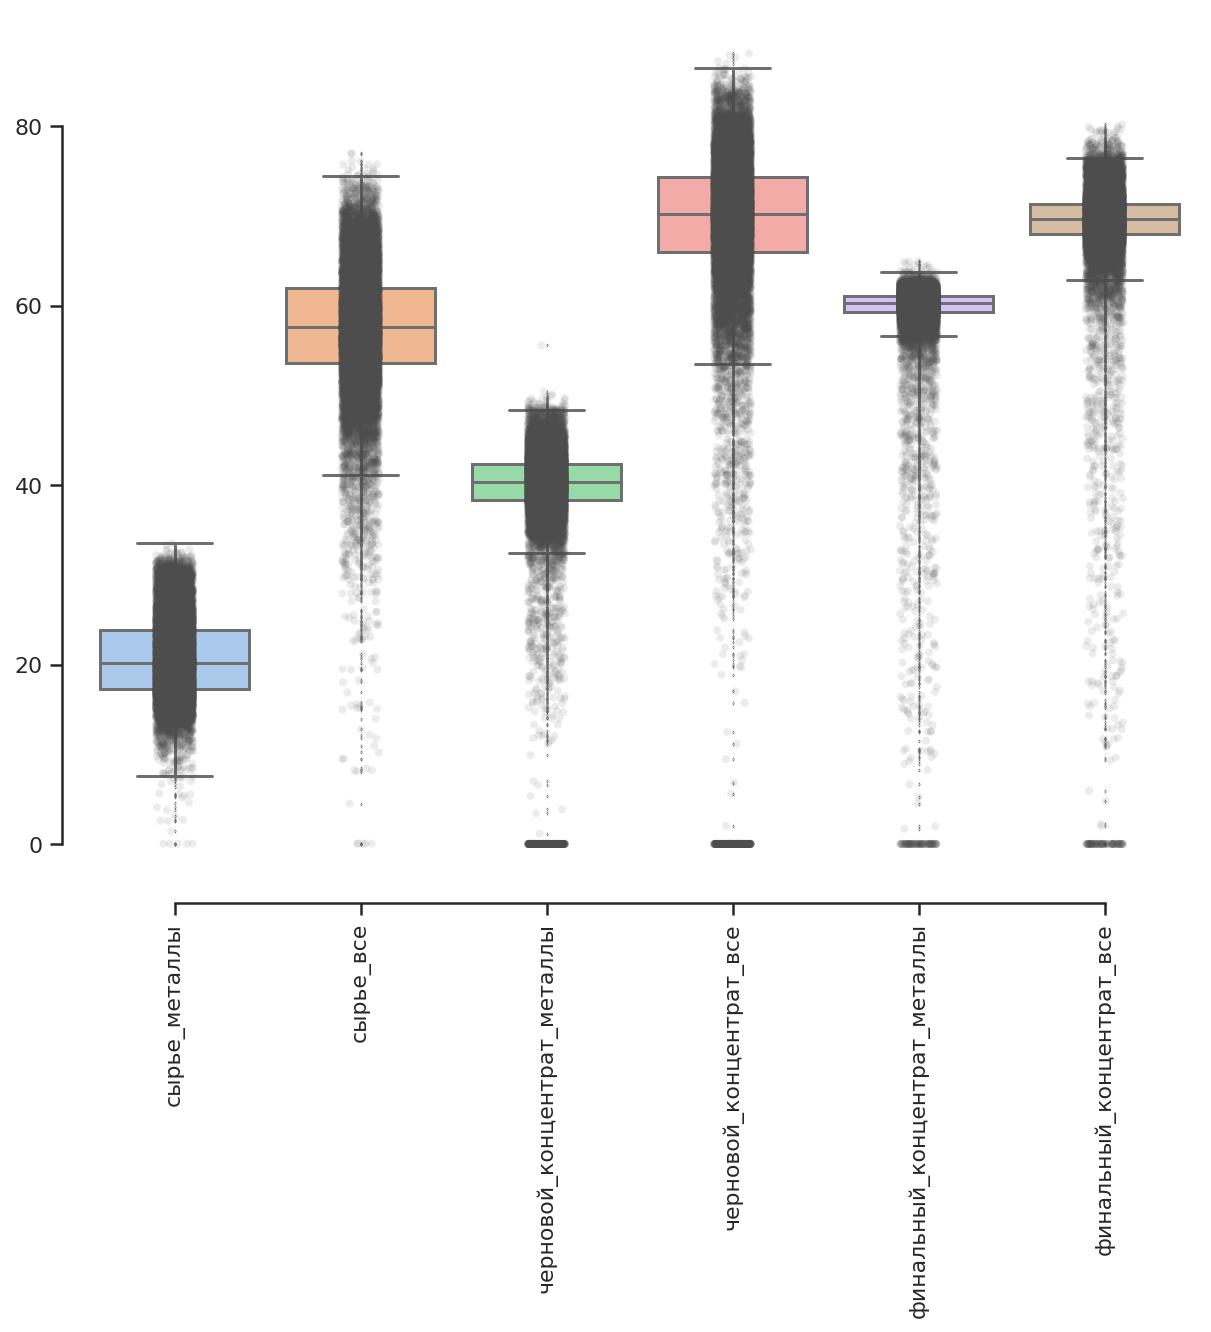

In [26]:
sns.set_theme(style="ticks", palette="pastel")
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=temp, fliersize=0.1)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
sns.stripplot(data=temp, size=4, color=".3", linewidth=0, alpha=0.1)
plt.show()

Суммарная концентрация всех металлов растет на каждом этапе очистки из-за сильного увеличения концентрации золота. В финальном концентрате уменьшается концентрация всех исследуемых веществ, так как концентрация вещества `sol` на этапе очистки очень сильно уменьшается, позволяя расти концентрации золота вплоть до 50%. И все также имеются аномальные нулевые значения после флотации и далее.

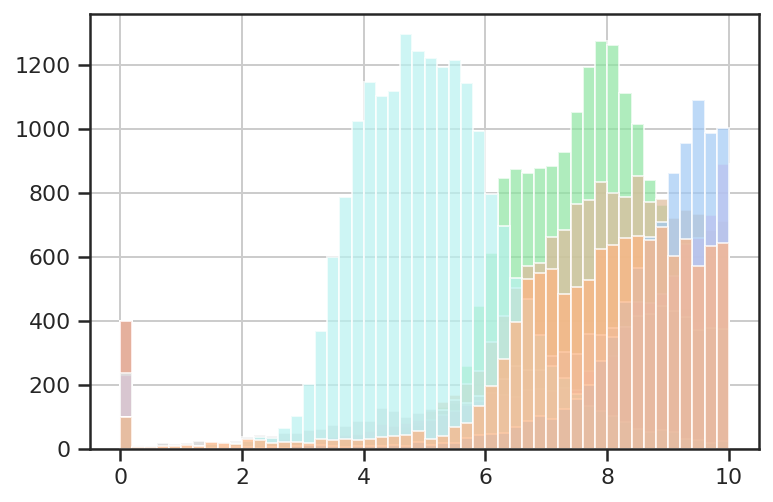

In [27]:
ls = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
      'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
      'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
      'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
      'final.output.concentrate_au', 'final.output.concentrate_ag', 
      'final.output.concentrate_pb', 'final.output.concentrate_sol']

for feature in ls:
    df[feature].hist(bins=50, range=(0,10), alpha=0.7)

Для всех рассматриваемых значений концентраций есть нулевые и около нулевые аномалии, которые можно удалить для улучшения качества обучения моделей. Посмотрим на распределение данных аномалий около нуля.

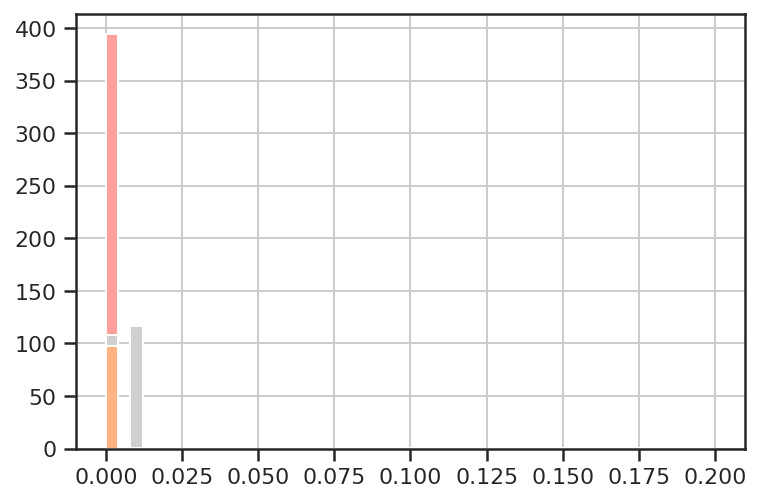

In [28]:
for feature in ls:
    df[feature].hist(bins=50, range=(0,0.2))

Порог в 0.05 гарантированно захватит все аномальные значения.

In [29]:
before = train.shape[0]
train_copy = train.copy()
for feature in ls:
    date_arr = df[df[feature] > 0.05]['date'].values
    train = train[train['date'].isin(date_arr)]
after = train.shape[0]
print(f'Удалено {(1 - after/before) * 100:.2f}%')

Удалено 4.76%


## Модель

### Определение метрики качества

In [30]:
def smape(y_true, predict):
    return 100/len(y_true) * np.sum(2 * np.abs(y_true - predict) / (np.abs(y_true) + np.abs(predict)))

smape_scorer = make_scorer(smape, greater_is_better=False)

### Подготовка библиотек и функций для подбора гиперпараметров

In [31]:
# готовим признаки и целевые переменные
X = train.drop(columns=['rougher.output.recovery',  'final.output.recovery', 'date']).copy()
y_rough = train['rougher.output.recovery']
y_final = train['final.output.recovery']

In [32]:
def objective(params, pipeline, X_train, y_train):
    """
    Кросс-валидация с текущими гиперпараметрами

    :params: гиперпараметры
    :pipeline: модель
    :X_train: матрица признаков
    :y_train: вектор меток объектов
    :return: средняя точность на кросс-валидации
    """ 

    # задаём модели требуемые параметры    
    pipeline.set_params(**params)

    # задаём параметры кросс-валидации (3-фолдовая с перемешиванием)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    # проводим кросс-валидацию  
    score = cross_val_score(estimator=pipeline, X=X_train, y=y_train, 
                            scoring=smape_scorer, cv=kf)

    # возвращаем результаты
    return   {'loss': -score.mean(), 'params': params, 'status': STATUS_OK}

### Построение моделей

#### Baseline

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(estimator=DummyRegressor(strategy="median"), X=X, y=y_rough, scoring=smape_scorer, cv=kf)
-score.mean()

6.923098812612947

In [34]:
score = cross_val_score(estimator=DummyRegressor(strategy="median"), X=X, y=y_final, scoring=smape_scorer, cv=kf)
-score.mean()

9.29280472636375

#### Линейная регрессия

In [35]:
score = cross_val_score(estimator=LinearRegression(), X=X, y=y_rough, scoring=smape_scorer, cv=kf)
-score.mean()

4.391048031593699

In [36]:
score = cross_val_score(estimator=LinearRegression(), X=X, y=y_final, scoring=smape_scorer, cv=kf)
-score.mean()

7.339533059079644

#### Стохастический градиентный спуск

In [37]:
model = Pipeline([('scaler', StandardScaler()),
                  ('sgd', SGDRegressor())])

search_space = {'sgd__alpha' : hp.loguniform(label='alpha', low=10**(-5), high=10)}

In [38]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_rough),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [01:00<00:00,  1.66trial/s, best loss: 4.819465789666198]


{'alpha': 1.0030707485087604}

In [39]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_final),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [01:00<00:00,  1.66trial/s, best loss: 7.743958270279385]


{'alpha': 1.0070411799806642}

#### Гребневая регрессия

In [40]:
model = Pipeline([('scaler', StandardScaler()),
                  ('ridge', Ridge())])

search_space = {'ridge__alpha' : hp.loguniform(label='alpha', low=10**(-5), high=10)}

In [41]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_rough),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [00:59<00:00,  1.68trial/s, best loss: 4.38510502789779] 


{'alpha': 121.32094360749925}

In [42]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_final),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [00:59<00:00,  1.67trial/s, best loss: 7.338650129689767]


{'alpha': 8.910998740707775}

#### Метод k-ближайших соседей

In [43]:
# итоговая модель

model = Pipeline([('scaler', StandardScaler()),
                  ('knn', KNeighborsRegressor())])

search_space = {
                'knn__n_neighbors' : hp.choice(label="n_neighbors", options=np.arange(2, 100))
                }

In [44]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_rough),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [06:13<00:00,  3.74s/trial, best loss: 2.197707036109339]


{'n_neighbors': 0}

In [45]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_final),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [06:14<00:00,  3.75s/trial, best loss: 4.816866551963689]


{'n_neighbors': 0}

#### Случайный лес

In [46]:
# итоговая модель
model = Pipeline([('rf', RandomForestRegressor(random_state=42))])

search_space = {
                'rf__max_depth': hp.choice(label="max_depth", options=np.arange(2, 20)),
                'rf__min_samples_leaf': hp.choice(label="min_samples_leaf", options=np.arange(1, 20)),
                'rf__max_features': hp.choice(label="max_features", options=np.arange(5, 53))
                }

In [47]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_rough),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [1:01:09<00:00, 36.69s/trial, best loss: 2.4734436082595903]


{'max_depth': 16, 'max_features': 11, 'min_samples_leaf': 1}

In [48]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_final),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [57:36<00:00, 34.57s/trial, best loss: 5.207935084965025] 


{'max_depth': 17, 'max_features': 17, 'min_samples_leaf': 1}

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

#### Градиентный бустинг (sklearn с подбором гиперпараметров)

In [49]:
# итоговая модель
model = Pipeline([('gb', GradientBoostingRegressor(random_state=42))])

search_space = {
                'gb__max_depth' : hp.choice(label="max_depth", options=np.arange(2, 8)),
                'gb__min_samples_leaf' : hp.choice(label="min_samples_leaf", options=np.arange(2, 10)),
                'gb__max_features' : hp.choice(label="max_features", options=np.arange(25, 50, 5)),
                'gb__n_estimators' : hp.choice(label="n_estimators", options=np.arange(50, 200, 10)),
                'gb__learning_rate' : hp.uniform(label="learning_rate", low=0.01, high=0.5)
                }

In [50]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_rough),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [1:31:12<00:00, 54.72s/trial, best loss: 2.444833116937866]


{'learning_rate': 0.10099621258796587,
 'max_depth': 5,
 'max_features': 0,
 'min_samples_leaf': 4,
 'n_estimators': 14}

In [51]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_final),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [1:36:16<00:00, 57.76s/trial, best loss: 5.238553539955802]


{'learning_rate': 0.10099621258796587,
 'max_depth': 5,
 'max_features': 0,
 'min_samples_leaf': 4,
 'n_estimators': 14}

#### Градиентный бустинг (CatBoost с автоматической установкой гиперпараметров)

In [52]:
params = {'verbose': 500,
          'random_seed': 42}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

score = cross_val_score(estimator=CatBoostRegressor(**params), X=X, y=y_rough, scoring=smape_scorer, cv=kf)

-score.mean()

Learning rate set to 0.059363
0:	learn: 7.2662884	total: 74.1ms	remaining: 1m 14s
500:	learn: 2.3889018	total: 11.2s	remaining: 11.1s
999:	learn: 1.7946205	total: 22.2s	remaining: 0us
Learning rate set to 0.059363
0:	learn: 7.2830613	total: 19ms	remaining: 19s
500:	learn: 2.3613196	total: 10.7s	remaining: 10.7s
999:	learn: 1.7920603	total: 21.2s	remaining: 0us
Learning rate set to 0.059363
0:	learn: 7.3413623	total: 24.1ms	remaining: 24.1s
500:	learn: 2.3723619	total: 11s	remaining: 10.9s
999:	learn: 1.7731047	total: 22.2s	remaining: 0us
Learning rate set to 0.059364
0:	learn: 7.2710034	total: 17.3ms	remaining: 17.3s
500:	learn: 2.3792076	total: 11.5s	remaining: 11.4s
999:	learn: 1.8066901	total: 22.4s	remaining: 0us
Learning rate set to 0.059364
0:	learn: 7.2689968	total: 29.1ms	remaining: 29.1s
500:	learn: 2.3964036	total: 10.4s	remaining: 10.4s
999:	learn: 1.8032563	total: 21s	remaining: 0us


2.4063965483381566

In [53]:
score = cross_val_score(estimator=CatBoostRegressor(**params), X=X, y=y_final, scoring=smape_scorer, cv=kf)
-score.mean()

Learning rate set to 0.059363
0:	learn: 8.2900091	total: 18.3ms	remaining: 18.3s
500:	learn: 4.0587264	total: 10.3s	remaining: 10.3s
999:	learn: 3.1462701	total: 21.2s	remaining: 0us
Learning rate set to 0.059363
0:	learn: 8.2382788	total: 33.3ms	remaining: 33.2s
500:	learn: 4.0236773	total: 11.1s	remaining: 11s
999:	learn: 3.1250587	total: 21.6s	remaining: 0us
Learning rate set to 0.059363
0:	learn: 8.2757207	total: 18.3ms	remaining: 18.3s
500:	learn: 4.0414917	total: 10.4s	remaining: 10.4s
999:	learn: 3.1282028	total: 21.5s	remaining: 0us
Learning rate set to 0.059364
0:	learn: 8.3178945	total: 19ms	remaining: 19s
500:	learn: 4.1018784	total: 12.2s	remaining: 12.2s
999:	learn: 3.1794287	total: 24.7s	remaining: 0us
Learning rate set to 0.059364
0:	learn: 8.1735778	total: 18.3ms	remaining: 18.3s
500:	learn: 4.0272161	total: 11.6s	remaining: 11.6s
999:	learn: 3.1281960	total: 23.5s	remaining: 0us


5.14749694289443

#### Ручная проверка лучшей модели повтороной кросс-валидацией

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = Pipeline([('scaler', StandardScaler()),
                  ('knn', KNeighborsRegressor(n_neighbors=2))])

score = cross_val_score(estimator=model, X=X, y=y_rough, scoring=smape_scorer, cv=kf)

-score.mean()

2.0734923668931438

In [55]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = Pipeline([('scaler', StandardScaler()),
                  ('knn', KNeighborsRegressor(n_neighbors=2))])

score = cross_val_score(estimator=model, X=X, y=y_final, scoring=smape_scorer, cv=kf)

-score.mean()

4.659253748766754

### Финальное тестирование

#### Подготовка к финальному тестированию

In [56]:
# Присоединение целевых признаков к тестовой выборке для оценки качества модели
target = df[['date', 'rougher.output.recovery',  'final.output.recovery']]
test_full = test.merge(target, on='date')
# Объявление целевых признаков тестововй выборки
y_rough_test = test_full['rougher.output.recovery']
y_final_test = test_full['final.output.recovery']
# Объявление признаков тестововй выборки с заполнением пропусков по аналогичному методу из обучающей выборки
X_test = test.drop(columns='date').fillna(method='ffill')

#### Baseline тест

In [57]:
model = DummyRegressor(strategy="median")

model.fit(X, y_rough)
pred = model.predict(X_test)
smape_rough_dummy = smape(pred, y_rough_test)
mae_r = mean_absolute_error(pred, y_rough_test)

model.fit(X, y_final)
pred = model.predict(X_test)
smape_final_dummy = smape(pred, y_final_test)
mae_f = mean_absolute_error(pred, y_final_test)

print(f'''sMAPE rough: {smape_rough_dummy}
sMAPE final: {smape_final_dummy}
MAE rough: {mae_r}
MAE final: {mae_f}''')

sMAPE rough: 8.42830076268712
sMAPE final: 9.663915517496797
MAE rough: 5.543664657967397
MAE final: 5.979223140446886


#### Финальное тестирование 

In [58]:
model = Pipeline([('scaler', StandardScaler()),
                  ('knn', KNeighborsRegressor(n_neighbors=2))])

model.fit(X, y_rough)
pred = model.predict(X_test)
smape_rough = smape(pred, y_rough_test)
mae_r = mean_absolute_error(pred, y_rough_test)

model.fit(X, y_final)
pred = model.predict(X_test)
smape_final = smape(pred, y_final_test)
mae_f = mean_absolute_error(pred, y_final_test)

print(f'''sMAPE rough: {smape_rough}
sMAPE final: {smape_final}
MAE rough: {mae_r}
MAE final: {mae_f}''')

sMAPE rough: 9.217132778025734
sMAPE final: 10.991826839954205
MAE rough: 6.043424826411251
MAE final: 6.796384800272032


Крайне неожиданные результаты - качество на кросс валидации и на тестовой выборке разительно отличаются. Константное предсказание медианы оказывается лучше. 

Сразу напрашиваются несколько возможных проблем: 
- проблема экстраполяции - как мы уже узнали на этапе анализа данных, тестовая выборка достаточно сильно отличается от обучающей и метод k-ближайших соседей, возможно, не смог адекватно оценить значения на тесте.
- проблема избыточности признаков - возможно в данных слишком много мультиколлинеарных и незначительных признаков, под которые подстроился knn и, как следствие, сильно переобучился.

Тут мы позволяем себе некоторую методологическую вольность, тестируя дополнительную модель на тестовой выборке, но к сожалению, иначе указанные выше проблемы не исправить. Для решения обоих проблем должна относительно неплохо подходить гребневая регрессия, так как она, как классическая линейная модель должна неплохо экстраполирвать и также как раз специально применяется для борьбы с избыточностью данных.

In [89]:
model = Pipeline([('scaler', StandardScaler()),
                  ('ridge', Ridge(alpha=121.32))])

model.fit(X, y_rough)
pred = model.predict(X_test)
smape_rough = smape(pred, y_rough_test)
mae_r = mean_absolute_error(pred, y_rough_test)

model = Pipeline([('scaler', StandardScaler()),
                  ('ridge', Ridge(alpha=8.91))])

model.fit(X, y_final)
pred = model.predict(X_test)
smape_final = smape(pred, y_final_test)
mae_f = mean_absolute_error(pred, y_final_test)

print(f'''sMAPE rough: {smape_rough}
sMAPE final: {smape_final}
MAE rough: {mae_r}
MAE final: {mae_f}''')

sMAPE rough: 8.639484221405368
sMAPE final: 9.365371757889715
MAE rough: 5.629122097330992
MAE final: 5.76106650423023


И все же для одного из целевых признаков мы получаем прогноз хуже константного. Лишний раз стоит убедиться, что хотя бы проблема с избыточностью данных решена. Для этого отберем только по 3 признака, наиболее скоррелированных с каждым из целевых признаков и обучим на них гребневую регрессию.

<AxesSubplot:>

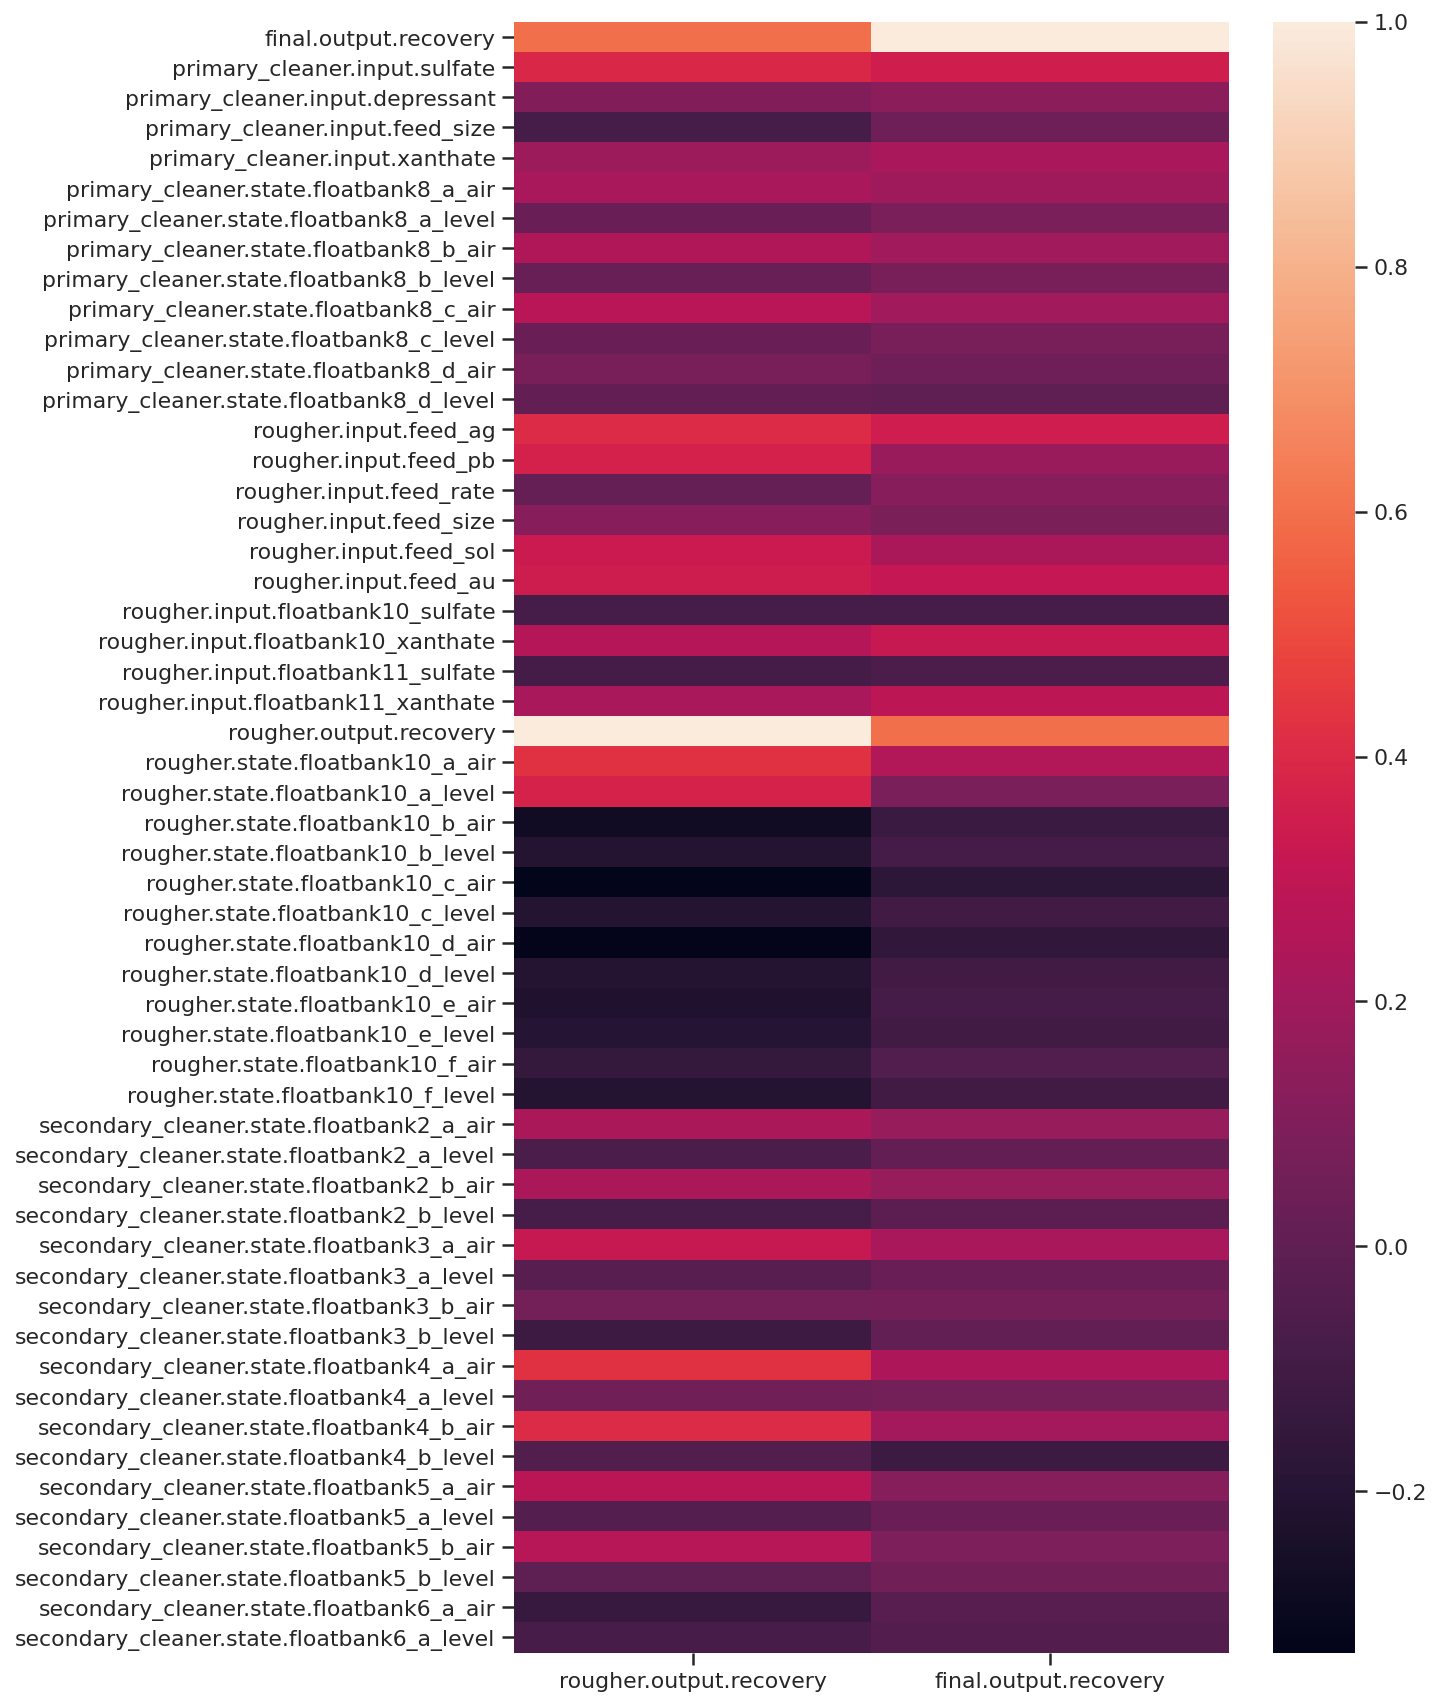

In [60]:
corr = train.corr()[['rougher.output.recovery',  'final.output.recovery']]
plt.figure(figsize=(8, 15))
sns.heatmap(corr)

In [61]:
train.corr()[['rougher.output.recovery',  'final.output.recovery']].sort_values(by='final.output.recovery')

,rougher.output.recovery,final.output.recovery
rougher.state.floatbank10_c_air,-0.331757,-0.175532
rougher.state.floatbank10_d_air,-0.322130,-0.156608
rougher.state.floatbank10_b_air,-0.272836,-0.125672
secondary_cleaner.state.floatbank4_b_level,-0.049887,-0.118897
rougher.state.floatbank10_d_level,-0.204915,-0.101158
rougher.state.floatbank10_f_level,-0.201748,-0.100801
rougher.state.floatbank10_e_level,-0.200005,-0.099683
rougher.state.floatbank10_c_level,-0.202568,-0.099055
rougher.state.floatbank10_e_air,-0.219434,-0.091184
rougher.state.floatbank10_b_level,-0.203914,-0.087483


In [90]:
X_rough = X[['primary_cleaner.input.sulfate', 
             'rougher.state.floatbank10_a_air',
             'secondary_cleaner.state.floatbank4_a_air']]
X_rough_test = X_test[['primary_cleaner.input.sulfate', 
                     'rougher.state.floatbank10_a_air',
                     'secondary_cleaner.state.floatbank4_a_air']]
X_final = X[['primary_cleaner.input.sulfate', 
                     'rougher.input.feed_ag',
                     'rougher.input.feed_au']]
X_final_test = X_test[['primary_cleaner.input.sulfate', 
                     'rougher.input.feed_ag',
                     'rougher.input.feed_au']]

model = Pipeline([('scaler', StandardScaler()),
                  ('ridge', Ridge(alpha=121.32))])

model.fit(X_rough, y_rough)
pred = model.predict(X_rough_test)
smape_rough_model = smape(pred, y_rough_test)
mae_r = mean_absolute_error(pred, y_rough_test)

model = Pipeline([('scaler', StandardScaler()),
                  ('ridge', Ridge(alpha=8.91))])

model.fit(X_final, y_final)
pred = model.predict(X_final_test)
smape_final_model = smape(pred, y_final_test)
mae_f = mean_absolute_error(pred, y_final_test)

print(f'''sMAPE rough: {smape_rough_model}
sMAPE final: {smape_final_model}
MAE rough: {mae_r}
MAE final: {mae_f}''')

sMAPE rough: 7.877706818942968
sMAPE final: 9.113272457390293
MAE rough: 4.984333198613544
MAE final: 5.601303547497501


In [91]:
def final_smape(smape_rough, smape_final):
    return f'{round(smape_rough*0.25 + smape_final*0.75, 2)}%'

In [92]:
final_smape(smape_rough_dummy, smape_final_dummy), final_smape(smape_rough_model, smape_final_model)

('9.36%', '8.8%')

In [93]:
round(9.36 - 8.8, 2)

0.56

Действительно такая проблема явно существовала и все же, отличие от констаного предсказания все еще весьма незначительно, около полупроцента.

После некоторых раздумий, учитывая, что качество константного предсказания медианы оказывается лучше или близко к рассмотренным моделям, я решил попробовать заложить медианное предсказание в основу моделей - нормировать таргет по медиане и предсказывать не целевое значение, а его отличие от медианы.

### Тестирование похода с нормированием таргета

#### Baseline c нормированием

In [66]:
def func(x):
    global med_cross
    med_cross = np.median(x)
    return x - med_cross

def inverse_func(x):
    return x + med_cross


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [67]:
regr = TransformedTargetRegressor(regressor=DummyRegressor(strategy="median"),
                                  func=func,
                                  inverse_func=inverse_func)
score = cross_val_score(estimator=regr, X=X, y=y_rough, scoring=smape_scorer, cv=kf)
-score.mean()

6.923098812612947

In [68]:
score = cross_val_score(estimator=regr, X=X, y=y_final, scoring=smape_scorer, cv=kf)
-score.mean()

9.29280472636375

#### Метод k-ближайших соседей c нормированием

In [69]:
regr = TransformedTargetRegressor(regressor=KNeighborsRegressor(n_neighbors=2),
                                  func=func,
                                  inverse_func=inverse_func)

model = Pipeline([('scaler', StandardScaler()),
                  ('model', regr)])

score = cross_val_score(estimator=model, 
                        X=X, y=y_rough, scoring=smape_scorer, cv=kf)

-score.mean()

2.0734923668931438

In [70]:
score = cross_val_score(estimator=model, 
                        X=X, y=y_final, scoring=smape_scorer, cv=kf)

-score.mean()

4.659253748766754

#### Гребневая регрессия c нормированием

In [95]:
X_rough = X[['primary_cleaner.input.sulfate', 
             'rougher.state.floatbank10_a_air',
             'secondary_cleaner.state.floatbank4_a_air',
             'secondary_cleaner.state.floatbank3_a_air',
             'rougher.input.feed_sol',
             'rougher.input.feed_au',
             'rougher.state.floatbank10_a_level',
             'secondary_cleaner.state.floatbank4_b_air',
             'rougher.input.feed_pb',
             'rougher.input.feed_ag',
             'rougher.state.floatbank10_c_air',
             'rougher.state.floatbank10_d_air']]

X_final = X[['primary_cleaner.input.sulfate', 
                     'rougher.state.floatbank10_a_air',
                     'secondary_cleaner.state.floatbank4_a_air',
                     'rougher.input.feed_sol',
                     'rougher.input.floatbank11_xanthate',
                     'rougher.input.floatbank10_xanthate']]


regr = TransformedTargetRegressor(regressor=Ridge(),
                                  func=func,
                                  inverse_func=inverse_func)

model = Pipeline([('scaler', StandardScaler()),
                  ('model', regr)])

search_space = {'model__regressor__alpha' : hp.loguniform(label='alpha', low=10**(-5), high=10)}

In [72]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X_rough, y_train=y_rough),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [00:38<00:00,  2.60trial/s, best loss: 5.136407849572491]


{'alpha': 76.470546800078}

In [73]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X_final, y_train=y_final),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [00:34<00:00,  2.92trial/s, best loss: 8.123762626206487]


{'alpha': 271.18184242695185}

In [74]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_rough),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [00:55<00:00,  1.81trial/s, best loss: 4.38510502789779] 


{'alpha': 121.32094360749925}

In [75]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=model, X_train=X, y_train=y_final),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [00:58<00:00,  1.70trial/s, best loss: 7.338650129689767]


{'alpha': 8.910998740707775}

Результаты на кросс-валидации гребневой регрессии вновь показывают слабую оценку качества, так как мы уже знаем, что на тесте ограничение количества фичей положительно сказываются на качестве модели.

#### Случайный лес c нормированием

In [76]:
regr = TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),
                                  func=func,
                                  inverse_func=inverse_func)

model = Pipeline([('regr', regr)])

search_space = {
                'regressor__max_depth' : hp.choice(label="max_depth", options=np.arange(2, 20)),
                'regressor__min_samples_leaf' : hp.choice(label="min_samples_leaf", options=np.arange(1, 20)),
                'regressor__max_features' : hp.choice(label="max_features", options=np.arange(5, 53))
                }

In [77]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=regr, X_train=X, y_train=y_rough),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [1:21:58<00:00, 49.19s/trial, best loss: 2.481103369062444]


{'max_depth': 16, 'max_features': 29, 'min_samples_leaf': 3}

In [78]:
# запускаем hyperopt
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, pipeline=regr, X_train=X, y_train=y_final),
          # пространство поиска гиперпараметров  
            space=search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=100,
          # random state
            rstate=np.random.default_rng(42),
          # progressbar
            show_progressbar=True
)
best

100%|██████████| 100/100 [1:14:08<00:00, 44.49s/trial, best loss: 5.1917486799288906]


{'max_depth': 17, 'max_features': 14, 'min_samples_leaf': 1}

#### Градиентный бустинг (CatBoost с автоматической установкой гиперпараметров) c нормированием

In [79]:
params = {'verbose': 500,
          'random_seed': 42}
model = CatBoostRegressor(**params)
regr = TransformedTargetRegressor(regressor=model,
                                  func=func,
                                  inverse_func=inverse_func)
score = cross_val_score(estimator=regr, X=X, y=y_rough, scoring=smape_scorer, cv=kf)
-score.mean()

Learning rate set to 0.059363
0:	learn: 7.2662884	total: 27.6ms	remaining: 27.6s
500:	learn: 2.3889018	total: 11.5s	remaining: 11.4s
999:	learn: 1.7946205	total: 22.4s	remaining: 0us
Learning rate set to 0.059363
0:	learn: 7.2830613	total: 18.9ms	remaining: 18.9s
500:	learn: 2.3613196	total: 10.9s	remaining: 10.8s
999:	learn: 1.7920603	total: 22s	remaining: 0us
Learning rate set to 0.059363
0:	learn: 7.3413623	total: 27.4ms	remaining: 27.3s
500:	learn: 2.3723619	total: 11.2s	remaining: 11.2s
999:	learn: 1.7731047	total: 22.6s	remaining: 0us
Learning rate set to 0.059364
0:	learn: 7.2710035	total: 19.5ms	remaining: 19.5s
500:	learn: 2.3792076	total: 11s	remaining: 10.9s
999:	learn: 1.8052830	total: 22.3s	remaining: 0us
Learning rate set to 0.059364
0:	learn: 7.2689968	total: 38.8ms	remaining: 38.8s
500:	learn: 2.3964035	total: 11.3s	remaining: 11.3s
999:	learn: 1.8032563	total: 23.1s	remaining: 0us


2.405879928662764

In [80]:
score = cross_val_score(estimator=regr, X=X, y=y_final, scoring=smape_scorer, cv=kf)
-score.mean()

Learning rate set to 0.059363
0:	learn: 8.2900091	total: 29.3ms	remaining: 29.3s
500:	learn: 4.0587264	total: 13.4s	remaining: 13.3s
999:	learn: 3.1462700	total: 25.5s	remaining: 0us
Learning rate set to 0.059363
0:	learn: 8.2382788	total: 29.6ms	remaining: 29.6s
500:	learn: 4.0236773	total: 13.3s	remaining: 13.2s
999:	learn: 3.1250587	total: 26.9s	remaining: 0us
Learning rate set to 0.059363
0:	learn: 8.2757207	total: 29.2ms	remaining: 29.2s
500:	learn: 4.0414917	total: 13.4s	remaining: 13.3s
999:	learn: 3.1282028	total: 26.2s	remaining: 0us
Learning rate set to 0.059364
0:	learn: 8.3178945	total: 37.3ms	remaining: 37.2s
500:	learn: 4.0985538	total: 11s	remaining: 11s
999:	learn: 3.1758133	total: 22.2s	remaining: 0us
Learning rate set to 0.059364
0:	learn: 8.1735779	total: 30ms	remaining: 29.9s
500:	learn: 4.0272161	total: 11.3s	remaining: 11.3s
999:	learn: 3.1144698	total: 22.5s	remaining: 0us


5.148441242998809

Нормирование действительно позволяет получить лучшие результаты на кросс-валидации, однако в силу рассмотренных выше проблем а также, вероятно, значительной разницы между обучающей и тестовой выборками и низкой дисперсии тестовой, метод k-ближайших соседей больше не будем рассматривать как потенциально успешную модель и тестировать на тестовой выборке. 

### Финальное тестирование с масштабированием таргета

#### Baseline c нормированием тест

In [81]:
regr = TransformedTargetRegressor(regressor=DummyRegressor(strategy="median"),
                                  func=func,
                                  inverse_func=inverse_func)

regr.fit(X, y_rough)
pred = regr.predict(X_test)
smape_rough_dummy = smape(pred, y_rough_test)

regr.fit(X, y_final)
pred = regr.predict(X_test)
smape_final_dummy = smape(pred, y_final_test)

print(f'''sMAPE rough: {smape_rough_dummy}
sMAPE final: {smape_final_dummy}''')

sMAPE rough: 8.42830076268712
sMAPE final: 9.663915517496797


In [82]:
final_smape(smape_rough_dummy, smape_final_dummy)

'9.36%'

#### Финальное тестирование c нормированием

Мы опробуем 2 модели c нормированием целевого признака по медиане - градиентный бустинг (CatBoost с автоматической установкой гиперпараметров), так как он дал лучшие результаты на кросс-валидации и гребневую регрессию, взяв немного больше признаков для нее, так как она должна хорошо подходить с теоретической точки зрения.

In [83]:
params = {'verbose': 500, 'random_seed': 42}

regr = TransformedTargetRegressor(regressor=CatBoostRegressor(**params),
                                  func=func,
                                  inverse_func=inverse_func)

regr.fit(X, y_rough)
pred = regr.predict(X_test)
smape_rough_model_cb = smape(pred, y_rough_test)

regr.fit(X, y_final)
pred = regr.predict(X_test)
smape_final_model_cb = smape(pred, y_final_test)

print(f'''sMAPE rough: {smape_rough_model_cb}
sMAPE final: {smape_final_model_cb}''')

Learning rate set to 0.061493
0:	learn: 7.2775673	total: 29.9ms	remaining: 29.9s
500:	learn: 2.4098996	total: 12.7s	remaining: 12.6s
999:	learn: 1.8584269	total: 27.1s	remaining: 0us
Learning rate set to 0.061493
0:	learn: 8.2493206	total: 30.3ms	remaining: 30.3s
500:	learn: 4.1133996	total: 13.6s	remaining: 13.6s
999:	learn: 3.2732324	total: 27.3s	remaining: 0us
sMAPE rough: 7.518645523866384
sMAPE final: 9.75572912420992


In [96]:
X_rough_test = X_test[['primary_cleaner.input.sulfate', 
             'rougher.state.floatbank10_a_air',
             'secondary_cleaner.state.floatbank4_a_air',
             'secondary_cleaner.state.floatbank3_a_air',
             'rougher.input.feed_sol',
             'rougher.input.feed_au',
             'rougher.state.floatbank10_a_level',
             'secondary_cleaner.state.floatbank4_b_air',
             'rougher.input.feed_pb',
             'rougher.input.feed_ag',
             'rougher.state.floatbank10_c_air',
             'rougher.state.floatbank10_d_air']]

X_final_test = X_test[['primary_cleaner.input.sulfate', 
                     'rougher.state.floatbank10_a_air',
                     'secondary_cleaner.state.floatbank4_a_air',
                     'rougher.input.feed_sol',
                     'rougher.input.floatbank11_xanthate',
                     'rougher.input.floatbank10_xanthate']]


regr = TransformedTargetRegressor(regressor=Ridge(alpha=76.47),
                                  func=func,
                                  inverse_func=inverse_func)

model = Pipeline([('scaler', StandardScaler()),
                  ('model', regr)])

model.fit(X_rough, y_rough)
pred = model.predict(X_rough_test)
smape_rough_model_rg = smape(pred, y_rough_test)

regr = TransformedTargetRegressor(regressor=Ridge(alpha=271.18),
                                  func=func,
                                  inverse_func=inverse_func)

model = Pipeline([('scaler', StandardScaler()),
                  ('model', regr)])

model.fit(X_final, y_final)
pred = model.predict(X_final_test)
smape_final_model_rg = smape(pred, y_final_test)

print(f'''sMAPE rough: {smape_rough_model_rg}
sMAPE final: {smape_final_model_rg}''')

sMAPE rough: 7.871456602167141
sMAPE final: 8.835306598960381


Основная проблема в наших выборках в том, что кросс-валидация дает очень плохую оценку качетсва на тесте. Поэтому в данном случае мы вновь допускаем некоторую методологическую вольность и тестируем две модели на тесте, так как оценить ожидаемое качество на новых данных, вновь отличающихся от обучающей выборки, возможно только с использованием тестовой выборки.

In [97]:
final_smape(smape_rough_model_cb, smape_final_model_rg)

'8.51%'

In [98]:
round(9.36 - 8.51, 2)

0.85

В итоге, можно предположить, что наилучший результат (почти на 1 процент лучше константного предсказания) дает комбинация моделей с предварительным нормированием по медиане целевого признака градиентного бустинга (CatBoost с автоматической установкой гиперпараметров) для предсказания восстановления после флотации и гребневой регрессии для предсказания восстановления после очистки. Однако, надо понимать, что данные выводы сделаны с довольно сильными методологическими допущениями, а значит существует значимая вероятность того, что такой подход будет нестабилен и покажет неожиданные результаты на новых данных. И так как отличие от константного предсказания медианы все же не велико, при невозможности проведения дополнительных исследований на новых данных, есть смысл отдать предпочтение значительно более простому и, возможно, более стабильному константному предсказанию медианы, либо градиентному бустингу, который без специальной настройки показывал в целом неплохие результаты и на обучающей и на тестовой выборке, как одному из наиболее часто используемых методов в реальных условиях.